In [17]:
import pandas as pd

# Use raw string to correctly format the file path on Windows
url = r'C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\outputRoary24_90\gene_presence_absence.csv'

# Read the CSV file from the local path
df = pd.read_csv(url)

# Function to get the annotation or function of a gene
def get_gene_function(data, gene_name):
    """
    Retrieve the function or annotation for a specified gene.

    Parameters:
    - data: pandas DataFrame containing the data.
    - gene_name: The name of the gene to search for.

    Returns:
    - A string with the gene's function or annotation, or an error message.
    """
    # Check if necessary columns exist
    if "Gene" not in data.columns or "Annotation" not in data.columns:
        return "The necessary columns ('Gene' and 'Annotation') are missing in the data."
    
    # Search for the gene in the 'Gene' column
    result = data[data['Gene'] == gene_name]
    
    if result.empty:
        return f"Gene '{gene_name}' not found in the dataset."
    
    # Return the annotation (function) of the gene
    return result['Annotation'].iloc[0]

# Example usage
gene_name = "rpmG"  # Replace this with the gene you're searching for
function = get_gene_function(df, gene_name)
print(function)



50S ribosomal protein L33


In [1]:
import os
import pandas as pd

def extract_identifiers_from_gff_with_pandas(file_path):
    """
    Extract bacterial identifiers from a .gff file using pandas.
    
    Parameters:
    - file_path: Path to the .gff file.
    
    Returns:
    - A list of identifiers extracted from the .gff file.
    """
    identifiers = []
    try:
        # Read the .gff file into a pandas DataFrame
        df = pd.read_csv(file_path, sep='\t', comment='#', header=None, engine='python')
        
        # Look for '##sequence-region' lines in the header
        with open(file_path, 'r') as file:
            for line in file:
                if line.startswith("##sequence-region"):
                    parts = line.split()
                    if len(parts) > 1:
                        identifiers.append(parts[1])  # Extract the identifier
    
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
    
    return identifiers

def extract_identifiers_from_folder_with_pandas(folder_path):
    """
    Extract bacterial identifiers from all .gff files in a folder using pandas.
    
    Parameters:
    - folder_path: Path to the folder containing .gff files.
    
    Returns:
    - A set of unique bacterial identifiers from all files.
    """
    all_identifiers = set()
    
    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".gff"):  # Check for .gff files
            file_path = os.path.join(folder_path, file_name)
            identifiers = extract_identifiers_from_gff_with_pandas(file_path)
            all_identifiers.update(identifiers)  # Add identifiers to the set
    
    return list(all_identifiers)

# Example usage
folder_path = r"C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\gff_fasta"  # Replace with your folder path
identifiers = extract_identifiers_from_folder_with_pandas(folder_path)
print("Bacterial Identifiers:")
print(identifiers)


Bacterial Identifiers:
['NZ_CP007392.1', 'NC_017628.1', 'NC_011741.1', 'NZ_CP013112.1', 'NZ_CP010116.1', 'NC_010473.1', 'NZ_CP029164.1', 'NC_011748.1', 'NC_012967.1', 'NC_011750.1', 'NC_020163.1', 'NZ_CP033605.1', 'NC_008253.1', 'NZ_CP048107.1', 'NZ_CP027440.1', 'NZ_CP053785.1', 'NZ_CP019944.1', 'NZ_LR778147.1', 'NZ_CP054388.1', 'NZ_CP043539.1', 'NC_022364.1', 'NZ_CP010121.1', 'NC_000913.3']


In [13]:
import os
import pandas as pd

def extract_genes_by_characteristic(file_path, bacterial_id, characteristic):
    """
    Extract genes with a specific characteristic for a given bacterial identifier from a .gff file.
    
    Parameters:
    - file_path: Path to the .gff file.
    - bacterial_id: The bacterial identifier to search for (e.g., "NC_000913.3").
    - characteristic: The characteristic to filter genes by (e.g., "hypothetical protein").
    
    Returns:
    - A list of gene names that match the characteristic.
    """
    genes = []
    
    try:
        # Read the .gff file into a pandas DataFrame
        gff_data = pd.read_csv(file_path, sep='\t', comment='#', header=None, engine='python')
        
        # Assign column names to the .gff format
        gff_data.columns = [
            "seqid", "source", "type", "start", "end", 
            "score", "strand", "phase", "attributes"
        ]
        
        # Filter rows for the given bacterial identifier and type "CDS"
        filtered_data = gff_data[(gff_data["seqid"] == bacterial_id) & (gff_data["type"] == "CDS")]
        
        # Search for the characteristic in the "attributes" column
        for _, row in filtered_data.iterrows():
            if characteristic in row["attributes"]:
                # Extract the gene name or locus_tag from attributes
                match = None
                if "Name=" in row["attributes"]:
                    match = row["attributes"].split("Name=")[1].split(";")[0]  # Extract the Name
               # elif "locus_tag=" in row["attributes"]:
                #    match = row["attributes"].split("locus_tag=")[1].split(";")[0]  # Extract locus_tag
                
                if match:
                    genes.append(match)
    
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
    
    return genes

def extract_genes_from_folder(folder_path, bacterial_id, characteristic):
    """
    Extract genes with a specific characteristic for a given bacterial identifier across all .gff files in a folder.
    
    Parameters:
    - folder_path: Path to the folder containing .gff files.
    - bacterial_id: The bacterial identifier to search for.
    - characteristic: The characteristic to filter genes by.
    
    Returns:
    - A dictionary where keys are file names and values are lists of matching genes.
    """
    genes_per_file = {}
    
    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".gff"):  # Check for .gff files
            file_path = os.path.join(folder_path, file_name)
            genes = extract_genes_by_characteristic(file_path, bacterial_id, characteristic)
            if genes:
                genes_per_file[file_name] = genes
    
    return genes_per_file

# Example usage
folder_path = r"C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\gff_fasta"  # Replace with your folder path
bacterial_id = "NC_000913.3"  # Replace with the desired bacterial identifier
characteristic = "hypothetical protein"  # Replace with the characteristic to search for
#
result = extract_genes_from_folder(folder_path, bacterial_id, characteristic)

# Print results
for file_name, genes in result.items():
    print(f"File: {file_name}")
    print(f"Genes with characteristic '{characteristic}':")
    print(genes)
    print()


['PICPPNBC_00004', 'PICPPNBC_00005', 'PICPPNBC_00010', 'PICPPNBC_00011', 'PICPPNBC_00015', 'PICPPNBC_00031', 'PICPPNBC_00053', 'PICPPNBC_00054', 'PICPPNBC_00064', 'PICPPNBC_00102', 'PICPPNBC_00111', 'PICPPNBC_00113', 'PICPPNBC_00116', 'PICPPNBC_00123', 'PICPPNBC_00124', 'PICPPNBC_00142', 'PICPPNBC_00151', 'PICPPNBC_00157', 'PICPPNBC_00168', 'PICPPNBC_00181', 'PICPPNBC_00184', 'PICPPNBC_00188', 'PICPPNBC_00204', 'PICPPNBC_00208', 'PICPPNBC_00212', 'PICPPNBC_00213', 'PICPPNBC_00214', 'PICPPNBC_00220', 'PICPPNBC_00223', 'PICPPNBC_00231', 'PICPPNBC_00235', 'PICPPNBC_00243', 'PICPPNBC_00246', 'PICPPNBC_00247', 'PICPPNBC_00249', 'PICPPNBC_00250', 'PICPPNBC_00251', 'PICPPNBC_00252', 'PICPPNBC_00255', 'PICPPNBC_00257', 'PICPPNBC_00260', 'PICPPNBC_00264', 'PICPPNBC_00278', 'PICPPNBC_00279', 'PICPPNBC_00280', 'PICPPNBC_00281', 'PICPPNBC_00282', 'PICPPNBC_00283', 'PICPPNBC_00285', 'PICPPNBC_00286', 'PICPPNBC_00300', 'PICPPNBC_00310', 'PICPPNBC_00317', 'PICPPNBC_00318', 'PICPPNBC_00319', 'PICPPNBC

In [14]:
import pandas as pd

# Load the file to inspect its contents
file_path = r'C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\Advanced Automation\cenas\AutoAvancada\data\raw\outputRoary24_90\gene_presence_absence.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head(), data.columns


(     Gene Non-unique Gene name                                     Annotation  \
 0    rpsR                  NaN                      30S ribosomal protein S18   
 1    typA                  NaN                  GTP-binding protein TypA/BipA   
 2  ygdR_2                  NaN                      putative lipoprotein YgdR   
 3    metJ                  NaN                                  Met repressor   
 4    ilvM                  NaN  Acetolactate synthase isozyme 2 small subunit   
 
    No. isolates  No. sequences  Avg sequences per isolate  Genome Fragment  \
 0            24             24                        1.0                1   
 1            24             24                        1.0                1   
 2            24             24                        1.0                1   
 3            24             24                        1.0                1   
 4            24             24                        1.0                1   
 
    Order within Fragment  Acc

In [31]:
# Filter rows with the annotation "hypothetical protein"
filtered_data = data[data['Annotation'] == 'hypothetical protein']

# Extract bacteria columns (presence/absence data)
bacteria_columns = [col for col in data.columns if col.startswith('GCF_')]

# Create a cross-table for filtered genes and bacteria
cross_table = filtered_data[['Gene'] + bacteria_columns].set_index('Gene').notnull()

# Convert the boolean values to 'True'/'False' for clarity
cross_table = cross_table.replace({True: 'X', False: ''})

# Display the resulting table
cross_table.head()



,GCF_000005845,GCF_000007445,GCF_000013305,GCF_000017985,GCF_000019425,GCF_000025745,GCF_000026245,GCF_000026265,GCF_000026345,GCF_000332755,...,GCF_001900315,GCF_002058765,GCF_003018255,GCF_003095635,GCF_003722195,GCF_004377995,GCF_008462425,GCF_010092965,GCF_013201505,GCF_902810335
Gene,,,,,,,,,,,,,,,,,,,,,
higB-2_2,,X,,,,X,X,X,,,...,X,,X,X,,,,X,,
higB-2_1,,X,,,,,X,X,X,,...,,,,X,,X,,X,,
group_6927,,X,X,,,X,,,,,...,,,X,X,,,,,,


In [33]:
# Filter rows where the 'Annotation' column contains "toxin" but not "antitoxin"
filtered_data = data[
    data['Annotation'].str.contains('toxin', case=False, na=False) &  # Contains "toxin" (case insensitive)
    ~data['Annotation'].str.contains('antitoxin', case=False, na=False)  # Excludes "antitoxin"
]

# Extract bacteria columns (presence/absence data)
bacteria_columns = [col for col in data.columns if col.startswith('GCF_')]

# Create a cross-table for filtered genes and bacteria
cross_table = filtered_data[['Gene'] + bacteria_columns].set_index('Gene').notnull()

# Convert the boolean values to 'True'/'False' for clarity
cross_table = cross_table.replace({True: 'X', False: ''})

# Display the resulting table
cross_table.head()


,GCF_000005845,GCF_000007445,GCF_000013305,GCF_000017985,GCF_000019425,GCF_000025745,GCF_000026245,GCF_000026265,GCF_000026345,GCF_000332755,...,GCF_001900315,GCF_002058765,GCF_003018255,GCF_003095635,GCF_003722195,GCF_004377995,GCF_008462425,GCF_010092965,GCF_013201505,GCF_902810335
Gene,,,,,,,,,,,,,,,,,,,,,
ghoT,X,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X
ratA,X,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X
yhaV,X,X,X,X,X,,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X
ortT,X,X,X,X,X,X,X,X,,X,...,X,X,X,X,X,X,X,X,X,X
hipA,X,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,,X,,X,X


C:\Users\X521\AppData\Local\Temp\ipykernel_10632\4066689372.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_cross_table = cross_table.replace({'X': 1, '': 0})


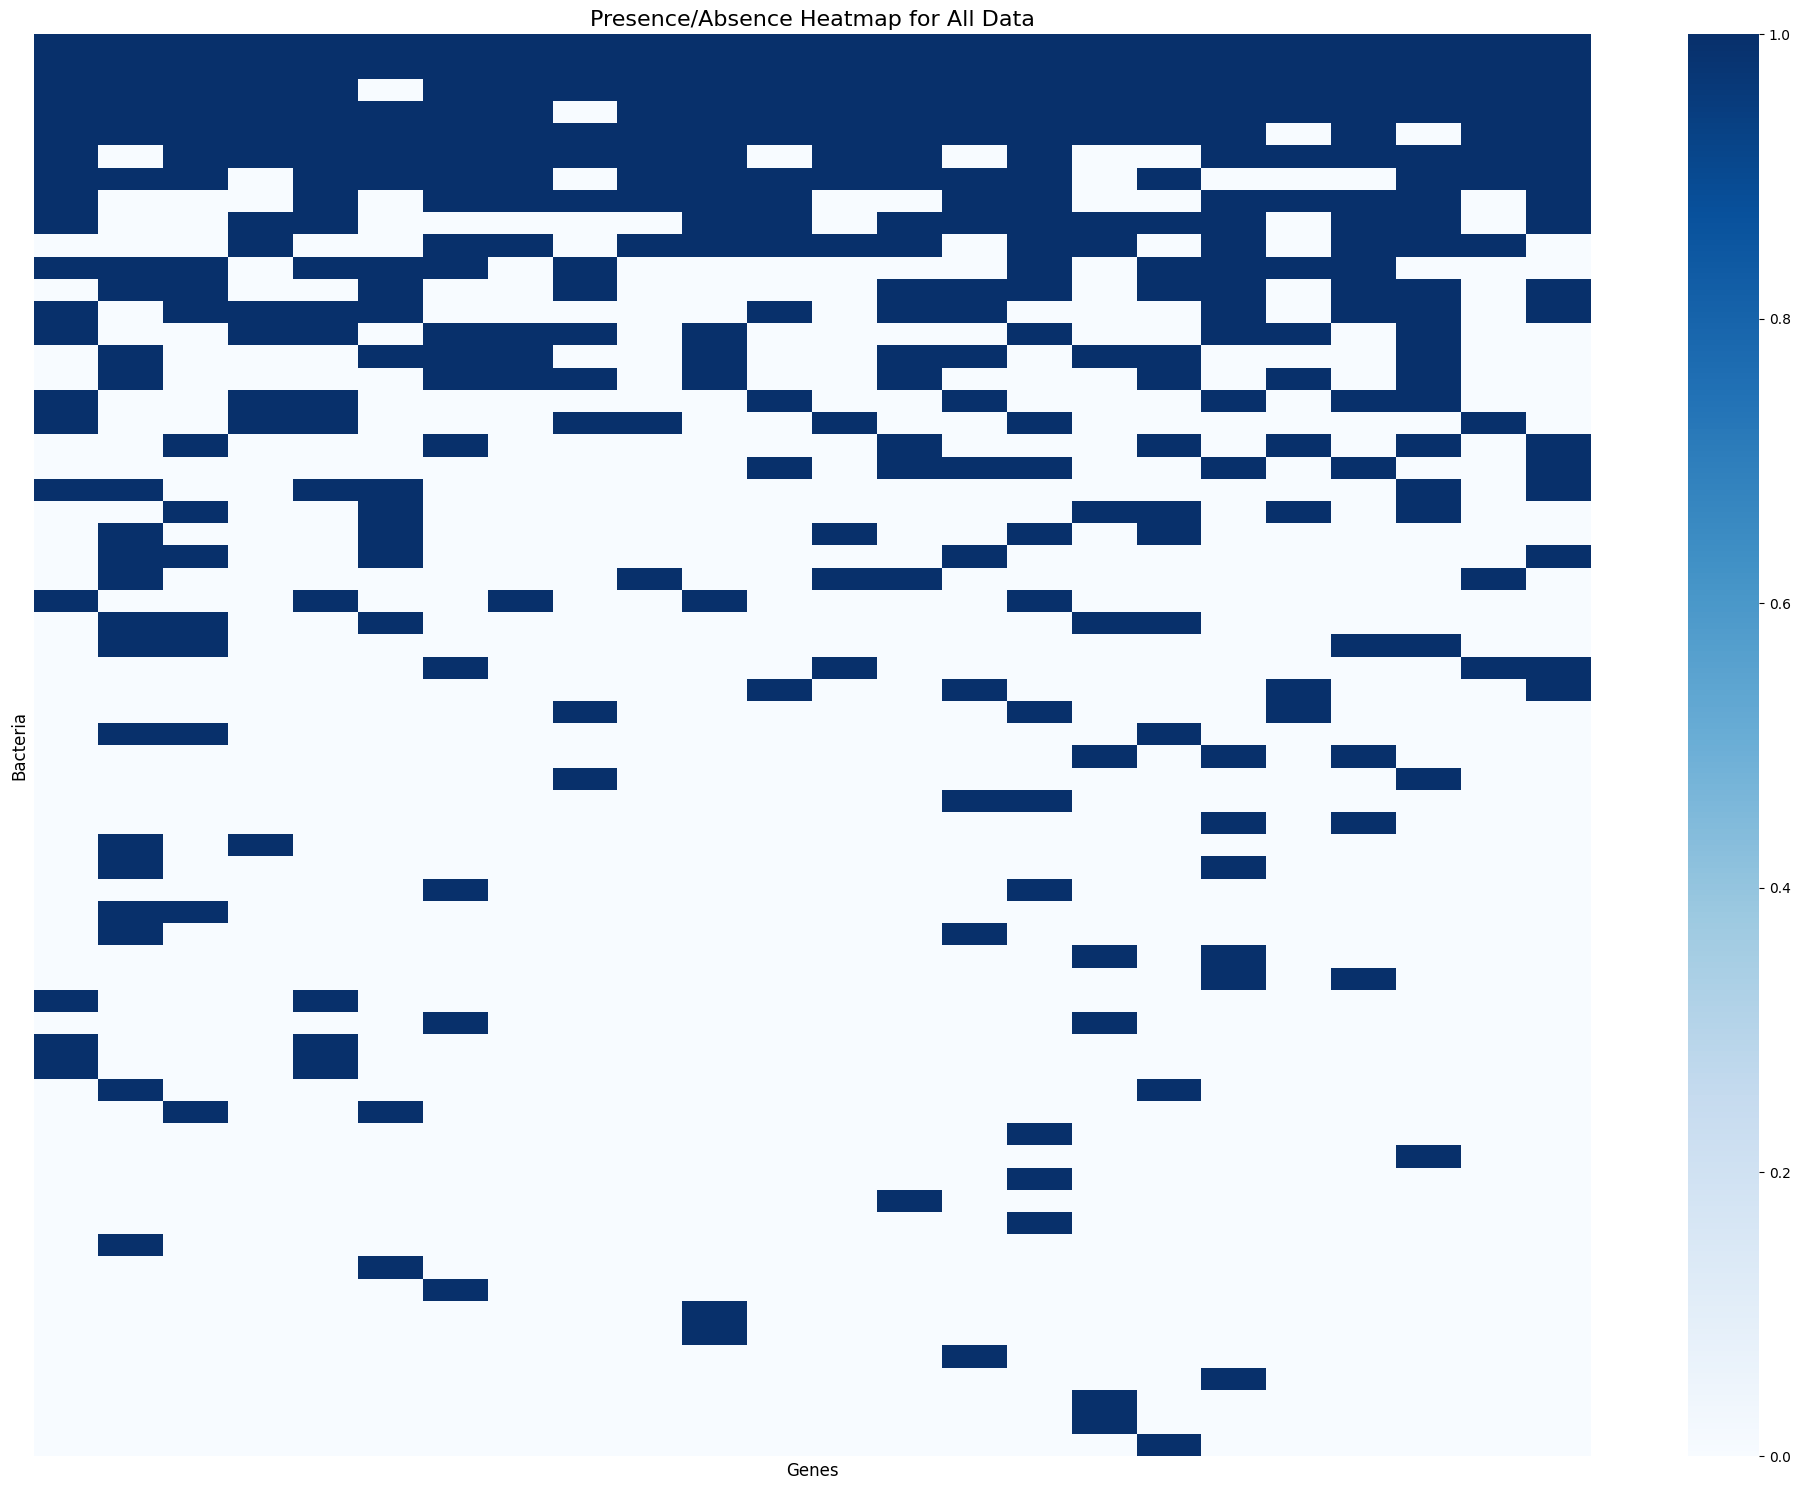

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'X' and '' to numeric values for visualization
numeric_cross_table = cross_table.replace({'X': 1, '': 0})

# Adjust figure size to accommodate the large dataset
plt.figure(figsize=(20, 15))

# Plot the heatmap with a reduced resolution (to make it readable)
sns.heatmap(
    numeric_cross_table,
    cmap='Blues',
    cbar=True,
    xticklabels=False,  # Hide x-axis labels for readability
    yticklabels=False,  # Hide y-axis labels for readability
    rasterized=True     # Optimized for large datasets
)

# Add title
plt.title('Presence/Absence Heatmap for All Data', fontsize=16)
plt.xlabel('Genes', fontsize=12)
plt.ylabel('Bacteria', fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()


C:\Users\X521\AppData\Local\Temp\ipykernel_10632\4066689372.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_cross_table = cross_table.replace({'X': 1, '': 0})


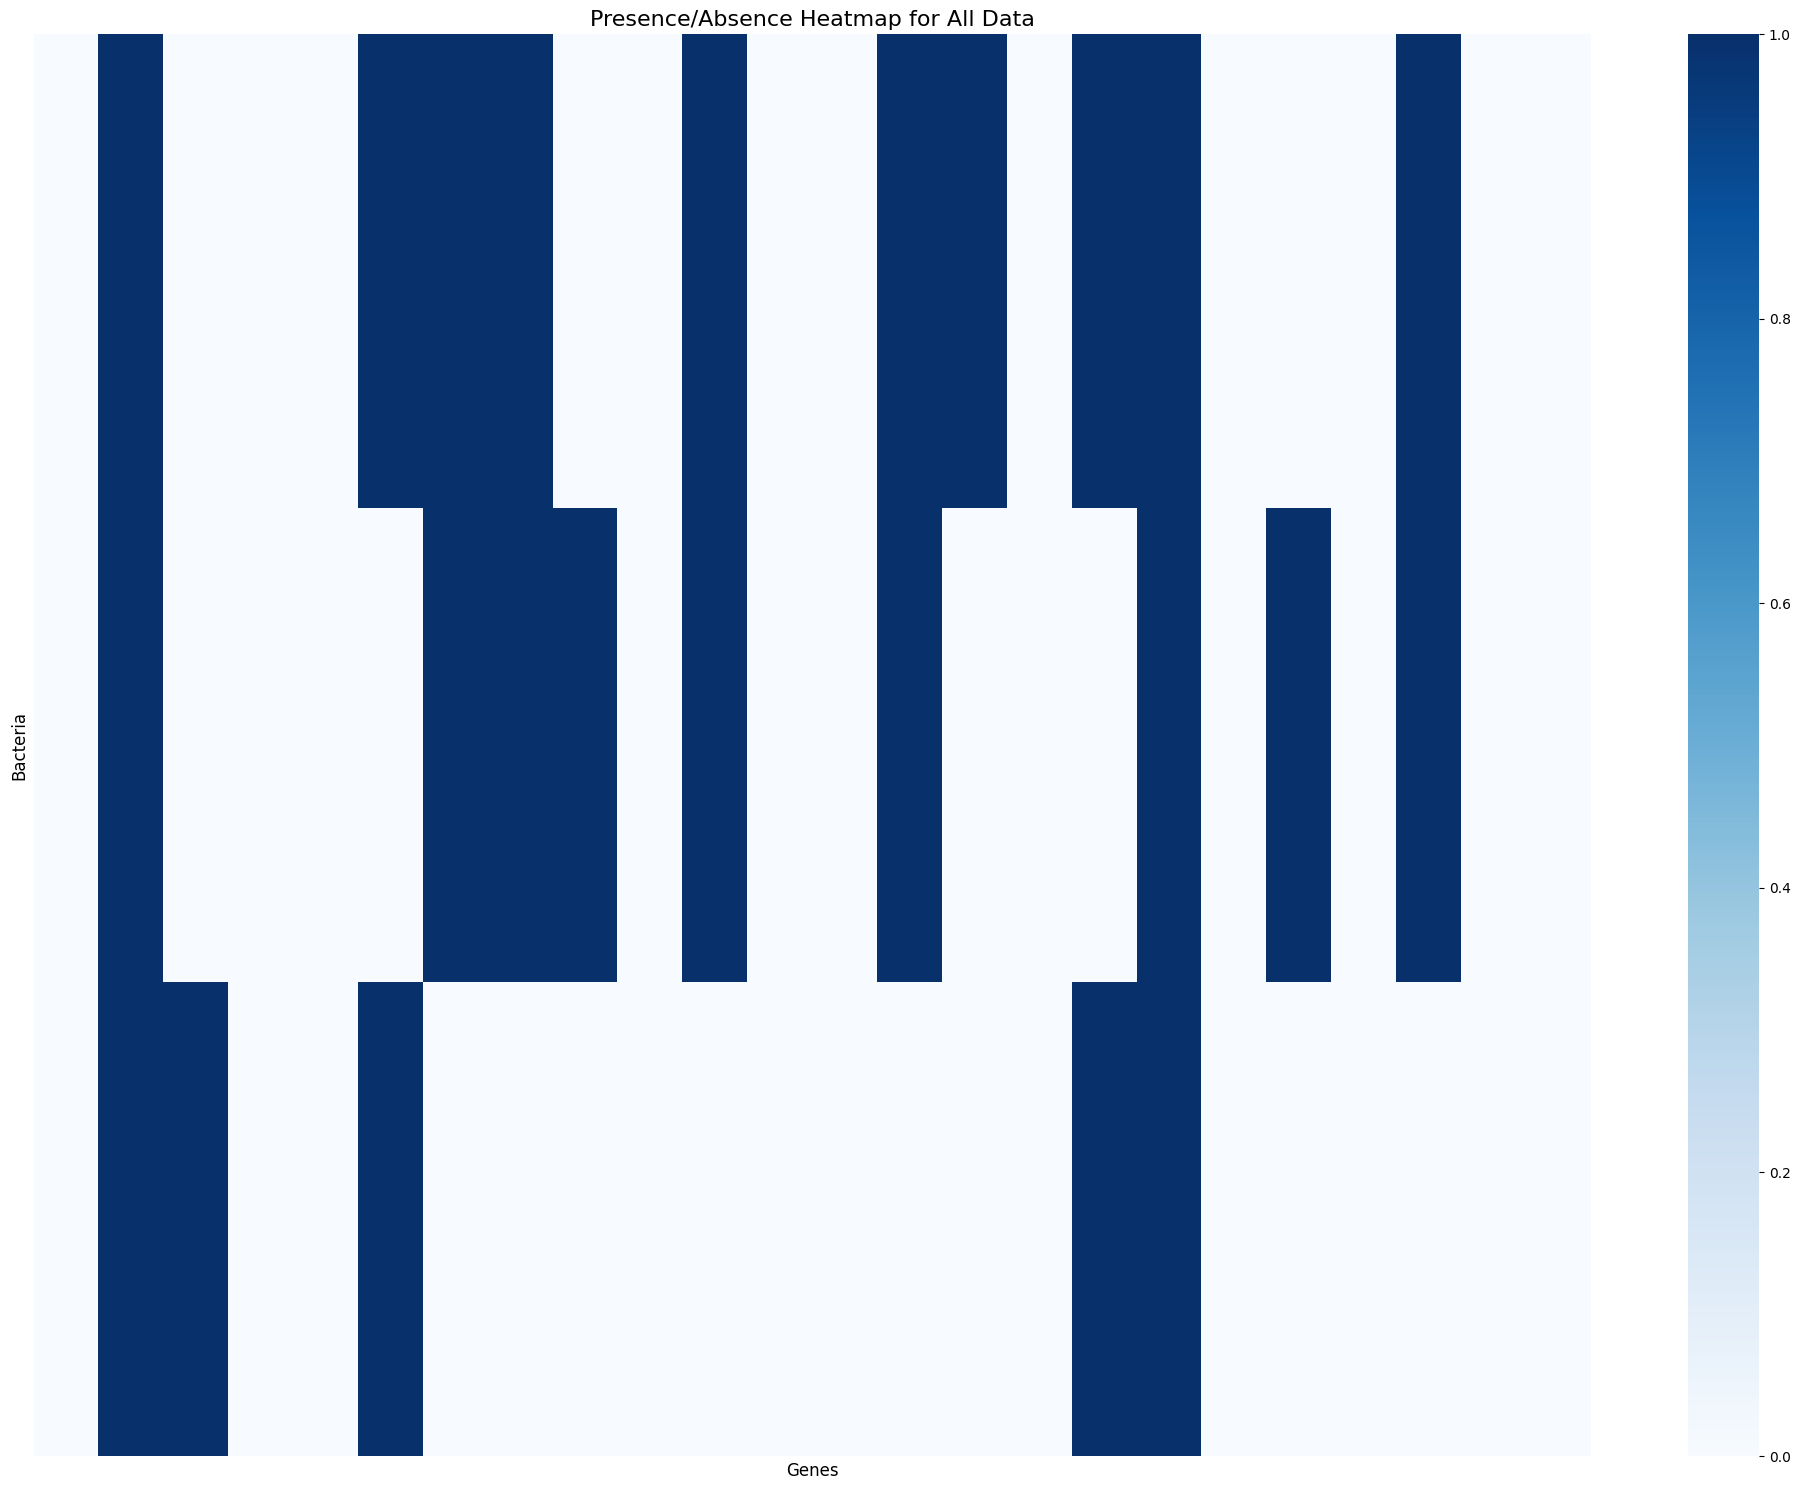

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'X' and '' to numeric values for visualization
numeric_cross_table = cross_table.replace({'X': 1, '': 0})

# Adjust figure size to accommodate the large dataset
plt.figure(figsize=(20, 15))

# Plot the heatmap with a reduced resolution (to make it readable)
sns.heatmap(
    numeric_cross_table,
    cmap='Blues',
    cbar=True,
    xticklabels=False,  # Hide x-axis labels for readability
    yticklabels=False,  # Hide y-axis labels for readability
    rasterized=True     # Optimized for large datasets
)

# Add title
plt.title('Presence/Absence Heatmap for All Data', fontsize=16)
plt.xlabel('Genes', fontsize=12)
plt.ylabel('Bacteria', fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()


In [30]:

# Step 3: Count the number of genes with the annotation for each bacterium
genes_with_annotation = filtered_data[bacteria_columns].notnull().sum()

# Step 4: Calculate the total number of genes for each bacterium
total_genes = data[bacteria_columns].notnull().sum()

# Step 5: Calculate the percentage
percentage_with_annotation = (genes_with_annotation / total_genes) * 100

# Display the results
percentage_with_annotation = percentage_with_annotation.sort_values(ascending=False)
print(percentage_with_annotation)


GCF_003722195    33.258970
GCF_008462425    31.696599
GCF_002058765    27.007154
GCF_000025745    26.597294
GCF_000026245    25.385256
GCF_010092965    24.969123
GCF_902810335    24.759916
GCF_001900315    24.715412
GCF_000007445    24.498567
GCF_003018255    24.217210
GCF_000026345    24.014932
GCF_000599665    23.764962
GCF_004377995    23.452905
GCF_001900295    23.066516
GCF_003095635    22.429907
GCF_000468515    22.381059
GCF_000332755    21.913237
GCF_001442495    21.438024
GCF_000013305    21.143235
GCF_000026265    20.352341
GCF_013201505    20.266606
GCF_000017985    19.039813
GCF_000019425    18.684331
GCF_000005845    18.234611
dtype: float64
